Wine Quality 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore 

In [2]:
df = pd.read_csv('wine_quality.csv')

# Summary Statistics

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.info()
# Hence no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1. We can observe that mean is greater than the median(50%). Hence it is : Right Skewed Data.
2. We can also see there is huge gap between 75% and max values in some of the columns, which implies outliers may be present.
3. Quality column : Target/ dependent variable is discrete and categorical in nature.
4. Quality ranges from 3 to 8, with 3 being the lowest score and 8 being the highest.

In [9]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Quality has values more concentrated in the categories:  5,6,7 and very few in 3,4 and 8

# Data Visualizations

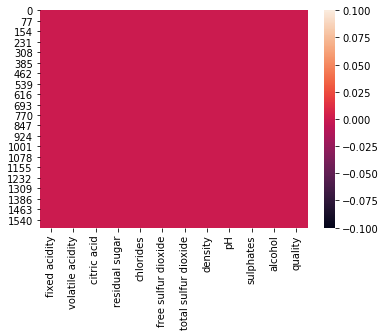

In [10]:
#To check if null values are present :
sns.heatmap(df.isnull())

Since the color is same in the all the dimensions, it means that there are no null values.

In [11]:
#Check correlation :
df_corr = df.corr()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [12]:
#sns.color_palette?

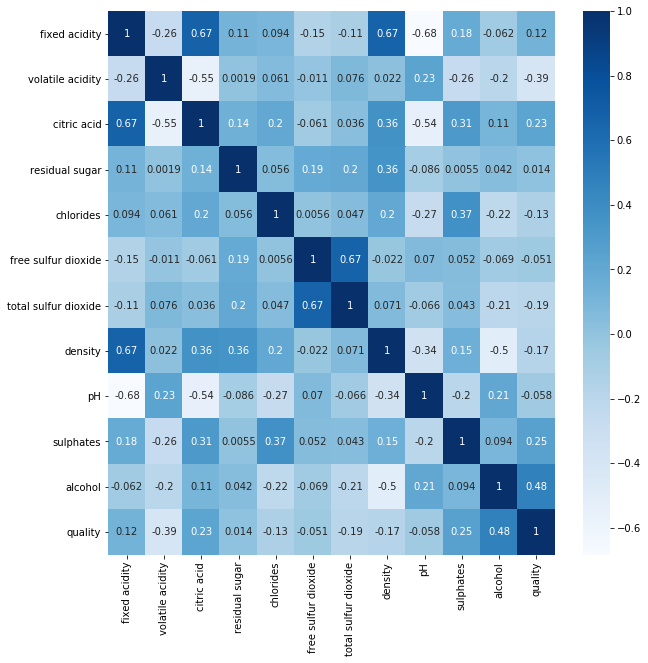

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,cmap='Blues',annot=True)

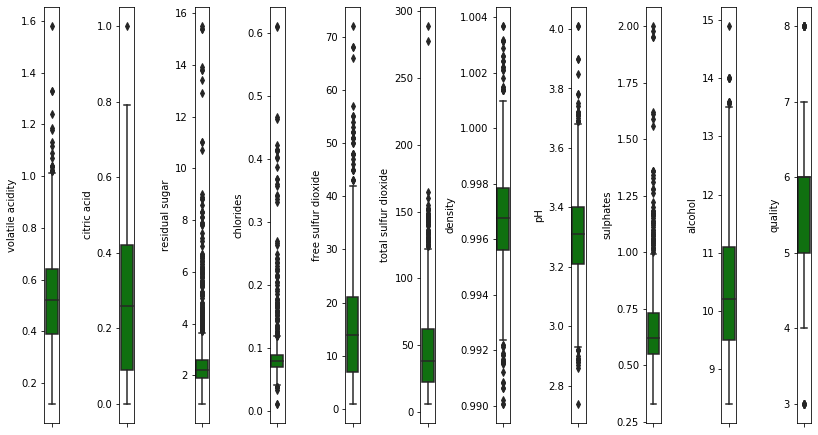

In [14]:
#Outliers : Plot multiple boxplots at once to identify outliers in all the columns : 
collist = df.columns.values # name of the columns
ncol=12
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

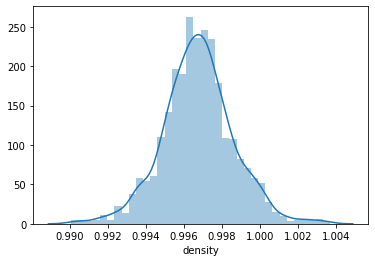

In [15]:
#To check skewness :
sns.distplot(df['density'])

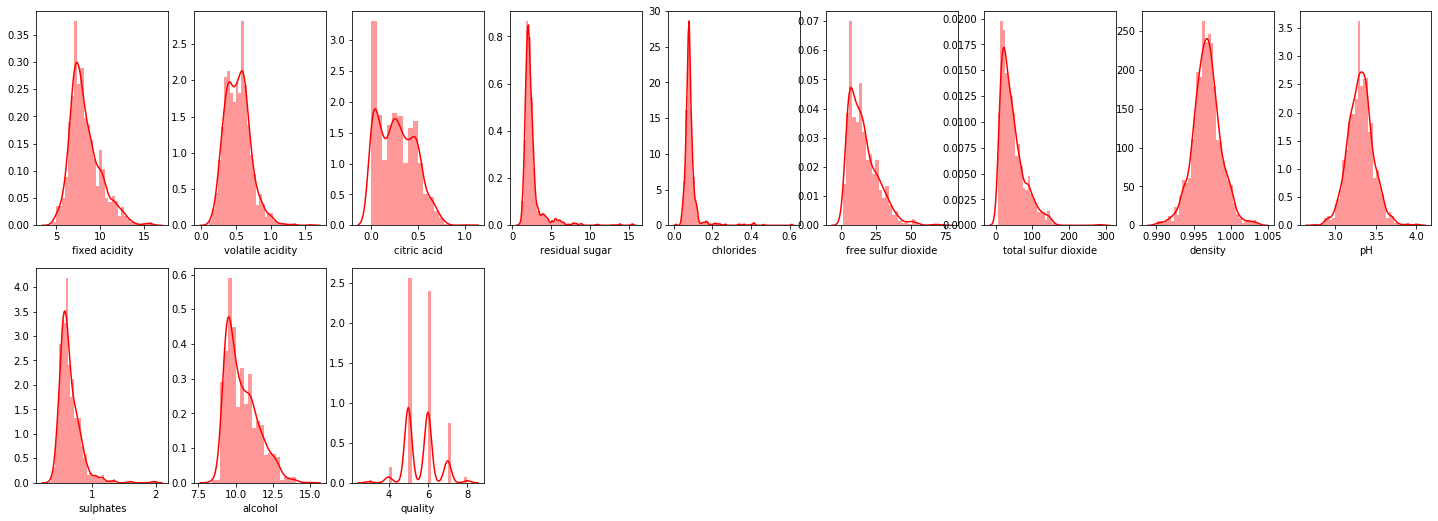

In [16]:
#Plot skewness in all columns
plt.figure(figsize=(25,75))
for i in range(0,len(collist)):
    plt.subplot(16,9,i+1)
    sns.distplot(df[collist[i]],color='red')

<Figure size 1152x1152 with 0 Axes>

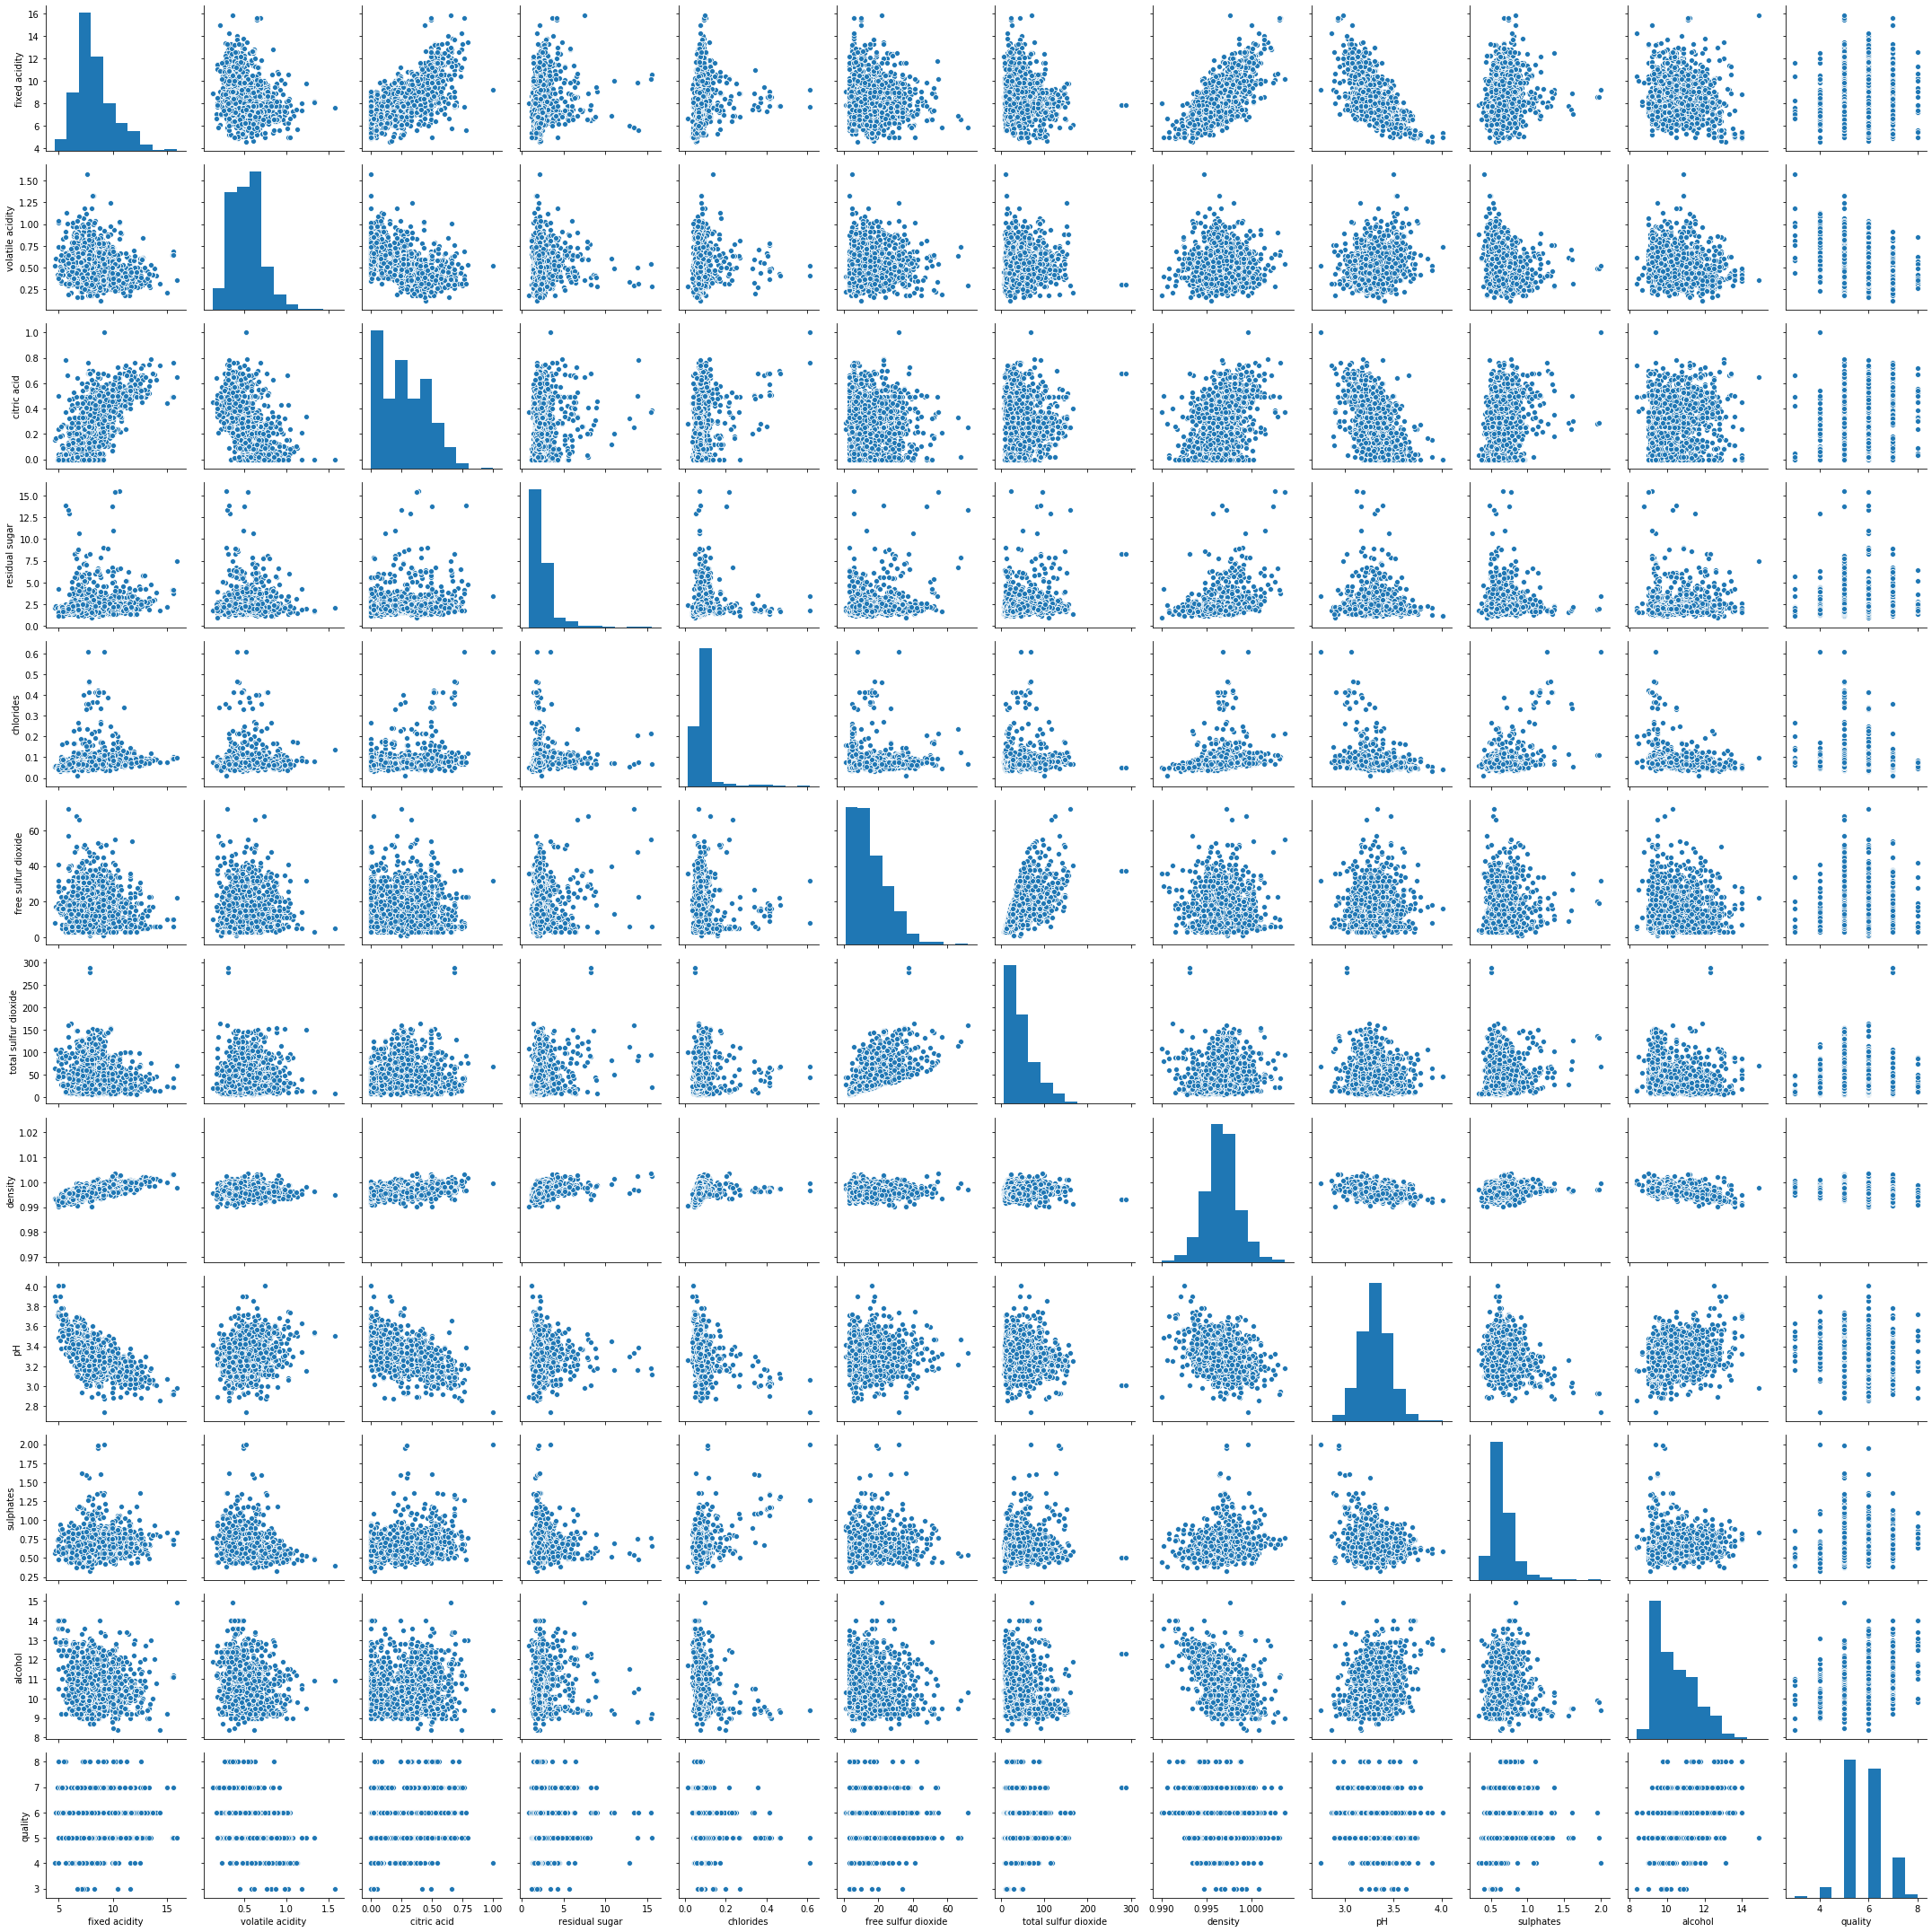

In [17]:
#pairplot
plt.figure(figsize=(16,16))
sns.pairplot(df)
plt.tight_layout()
plt.show()
    

Text(0, 0.5, 'Quality')

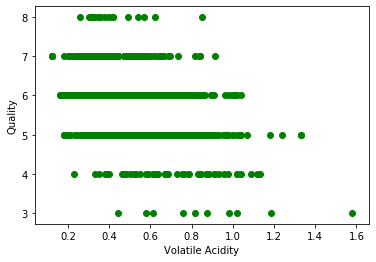

In [18]:
plt.scatter(df['volatile acidity'],df['quality'],color='Green')
plt.xlabel("Volatile Acidity")
plt.ylabel("Quality")

# Data Manipulation

In [19]:
# Remove the outliers : by finding z-scores:
#Define a threshold to identify the outlier.

z = np.abs(zscore(df))
threshold = 3
#print(np.where(z>threshold))
#print(z[1558][11])

#print ((df < (q1-1.5*IQR)),(df > (q3+1.5*IQR))) 
df_new = df[(z<threshold).all(axis=1)]
print(df_new.shape)
print(df.shape)

(1451, 12)
(1599, 12)


In [20]:
#Check for skewness : 
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [21]:
#Remove skewness
df_new['fixed acidity'] = np.sqrt(df_new['fixed acidity'])
df_new['residual sugar'] = np.sqrt(df_new['residual sugar'])
df_new['chlorides'] = np.sqrt(df_new['chlorides'])
df_new['free sulfur dioxide'] = np.sqrt(df_new['free sulfur dioxide'])
df_new['sulphates'] = np.sqrt(df_new['sulphates'])
df_new['alcohol'] = np.sqrt(df_new['alcohol'])
df_new['total sulfur dioxide'] = np.sqrt(df_new['total sulfur dioxide'])

In [22]:
#After removing skewness
df_new.skew()

fixed acidity           0.603623
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.834950
chlorides               1.305836
free sulfur dioxide     0.320117
total sulfur dioxide    0.557106
density                 0.055738
pH                      0.114705
sulphates               0.614878
alcohol                 0.674270
quality                 0.407865
dtype: float64

In [23]:
df_new['residual sugar'] = np.sqrt(df_new['residual sugar'])
df_new['alcohol'] = np.sqrt(df_new['alcohol'])

df_new.skew()


fixed acidity           0.603623
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.527702
chlorides               1.305836
free sulfur dioxide     0.320117
total sulfur dioxide    0.557106
density                 0.055738
pH                      0.114705
sulphates               0.614878
alcohol                 0.632998
quality                 0.407865
dtype: float64

# Model Selection:

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

X = df_new.drop('quality',axis=1)
y = df_new.iloc[:,-1]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)

In [27]:
def calBestRandomStateOf(model):
    max_score=0
    for i in range(150,501):
        x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = accuracy_score(y_test,pred)
        #print(i," : ", score)
        if score>max_score:
            max_score = score
            final_state = i

    print("Best score for random state ",final_state," is : ",max_score)

# Model Prediction and Evaluation

In [28]:
svl = SVC(kernel='linear')
calBestRandomStateOf(svl)

Best score for random state  231  is :  0.6804123711340206


In [31]:
svr = SVC(kernel='rbf')
calBestRandomStateOf(svr)

Best score for random state  231  is :  0.7216494845360825


In [32]:
svp = SVC(kernel='poly')
calBestRandomStateOf(svp)

Best score for random state  231  is :  0.7147766323024055


In [33]:
dfc = DecisionTreeClassifier()
calBestRandomStateOf(dfc)

Best score for random state  378  is :  0.697594501718213


In [34]:
knn = KNeighborsClassifier(6)
calBestRandomStateOf(knn)

Best score for random state  231  is :  0.6632302405498282


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svl,X,y,cv=5)
print(" Score : ",scores)
print(" Mean : ",scores.mean())
print(" Standard Deviation : ",scores.std())

 Score :  [0.51202749 0.52413793 0.64827586 0.56896552 0.59655172]
 Mean :  0.5699917051783387
 Standard Deviation :  0.04959297444201758


In [36]:
scores = cross_val_score(svr,X,y,cv=5)
print(" Score : ",scores)
print(" Mean : ",scores.mean())
print(" Standard Deviation : ",scores.std())

 Score :  [0.54639175 0.52758621 0.65862069 0.60344828 0.58275862]
 Mean :  0.5837611091361536
 Standard Deviation :  0.04592305469698832


In [37]:
scores = cross_val_score(svp,X,y,cv=5)
print(" Score : ",scores)
print(" Mean : ",scores.mean())
print(" Standard Deviation : ",scores.std())

 Score :  [0.53264605 0.5137931  0.62413793 0.60689655 0.53448276]
 Mean :  0.5623912785875104
 Standard Deviation :  0.04431436623745718


In [38]:
scores = cross_val_score(dfc,X,y,cv=5)
print(" Score : ",scores)
print(" Mean : ",scores.mean())
print(" Standard Deviation : ",scores.std())

 Score :  [0.47766323 0.46551724 0.44827586 0.46206897 0.47931034]
 Mean :  0.4665671288067307
 Standard Deviation :  0.011326245600771969


In [39]:
scores = cross_val_score(knn,X,y,cv=5)
print(" Score : ",scores)
print(" Mean : ",scores.mean())
print(" Standard Deviation : ",scores.std())

 Score :  [0.4742268  0.56896552 0.59655172 0.50689655 0.50689655]
 Mean :  0.5307074297902595
 Standard Deviation :  0.04499584260307723


In [40]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1,5,10,25,50,75,100,125]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [41]:
#Best Scoring model : SupportVectorClassifier 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=231)
svr = SVC(kernel='rbf',C=1)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

print("Accuracy Score   :     ",accuracy_score(y_test,y_pred))

Accuracy Score   :      0.7216494845360825


In [42]:
#Best Scoring model : SupportVectorClassifier 

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=231)
svr = SVC(kernel='rbf',C=5)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

print("Accuracy Score   :     ",accuracy_score(y_test,y_pred))
print()
print("Confusion Matrix : ")
print(confusion_matrix(y_test,y_pred))
print()
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy Score   :      0.7353951890034365

Confusion Matrix : 
[[  0   1   5   0   0]
 [  2 103  24   0   0]
 [  0  30  92   7   0]
 [  0   1   6  19   0]
 [  0   0   1   0   0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.76      0.80      0.78       129
           6       0.72      0.71      0.72       129
           7       0.73      0.73      0.73        26
           8       0.00      0.00      0.00         1

    accuracy                           0.74       291
   macro avg       0.44      0.45      0.45       291
weighted avg       0.72      0.74      0.73       291

